In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import dask.dataframe as dd

In [25]:
dataset=pd.read_csv('Online Retail.csv', sep=",",encoding='iso-8859-1', header=0)

In [3]:
dataset.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [4]:
dataset.replace([np.inf, -np.inf], np.nan, inplace=True)

In [6]:
dataset.shape

(541909, 8)

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [8]:
missing_values=100*(dataset.isnull().sum()/dataset.shape[0])

In [9]:
missing_values

InvoiceNo       0.000000
StockCode       0.000000
Description     0.268311
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     24.926694
Country         0.000000
dtype: float64

In [10]:
dataset=dataset.dropna()
dataset.shape

(406829, 8)

In [11]:
dataset['CustomerID']=dataset['CustomerID'].astype(str)

In [12]:
dataset['Amount']=dataset['Quantity']*dataset['UnitPrice']
new_data=dataset.groupby('CustomerID')['Amount'].sum()
new_data=new_data.reset_index()
new_data.head()

,CustomerID,Amount
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


In [13]:
new_f=dataset.groupby('CustomerID')['InvoiceNo'].count()
new_f=new_f.reset_index()
new_f.columns=['CustomerID','Frequency']
new_f.head()

,CustomerID,Frequency
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


In [14]:
merge_data=pd.merge(new_data,new_f, on='CustomerID', how='inner')
merge_data.head()

,CustomerID,Amount,Frequency
0,12346.0,0.00,2
1,12347.0,4310.00,182
2,12348.0,1797.24,31
3,12349.0,1757.55,73
4,12350.0,334.40,17


In [15]:
dataset['InvoiceDate'] = pd.to_datetime(dataset['InvoiceDate'], format='%d-%m-%Y %H:%M')

In [17]:
max_date = max(dataset['InvoiceDate'])
max_date

Timestamp('2011-12-09 12:50:00')

In [18]:
dataset['Diff']=max_date-dataset['InvoiceDate']
dataset.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount,Diff
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,373 days 04:24:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,373 days 04:24:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00


In [19]:
rfm_p=dataset.groupby('CustomerID')['Diff'].min()
rfm_p=rfm_p.reset_index()
rfm_p.head()

,CustomerID,Diff
0,12346.0,325 days 02:33:00
1,12347.0,1 days 20:58:00
2,12348.0,74 days 23:37:00
3,12349.0,18 days 02:59:00
4,12350.0,309 days 20:49:00


In [20]:
rfm_p = dataset[['CustomerID', 'Diff']]

In [21]:
rfm_p['Diff']=rfm_p['Diff'].dt.days
rfm_p.head()

C:\Users\shikh\AppData\Local\Temp\ipykernel_25624\1283961111.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm_p['Diff']=rfm_p['Diff'].dt.days


,CustomerID,Diff
0,17850.0,373
1,17850.0,373
2,17850.0,373
3,17850.0,373
4,17850.0,373


In [22]:
dataset = dd.read_csv('Online Retail.csv')



In [23]:
merge_data=pd.merge(merge_data, rfm_p, on='CustomerID', how='inner')
merge_data.columns=['CustomerID', 'Amount', 'Frequency','Recency']
merge_data.head()

,CustomerID,Amount,Frequency,Recency
0,12346.0,0.0,2,325
1,12346.0,0.0,2,325
2,12347.0,4310.0,182,366
3,12347.0,4310.0,182,366
4,12347.0,4310.0,182,366


In [26]:
dataset['InvoiceDate']=pd.to_datetime(dataset['InvoiceDate'], format='%d-%m-%Y %H:%M')
dataset['InvoiceDate']

0        2010-12-01 08:26:00
1        2010-12-01 08:26:00
2        2010-12-01 08:26:00
3        2010-12-01 08:26:00
4        2010-12-01 08:26:00
                 ...        
541904   2011-12-09 12:50:00
541905   2011-12-09 12:50:00
541906   2011-12-09 12:50:00
541907   2011-12-09 12:50:00
541908   2011-12-09 12:50:00
Name: InvoiceDate, Length: 541909, dtype: datetime64[ns]

Text(0.5, 0, 'Attributes')

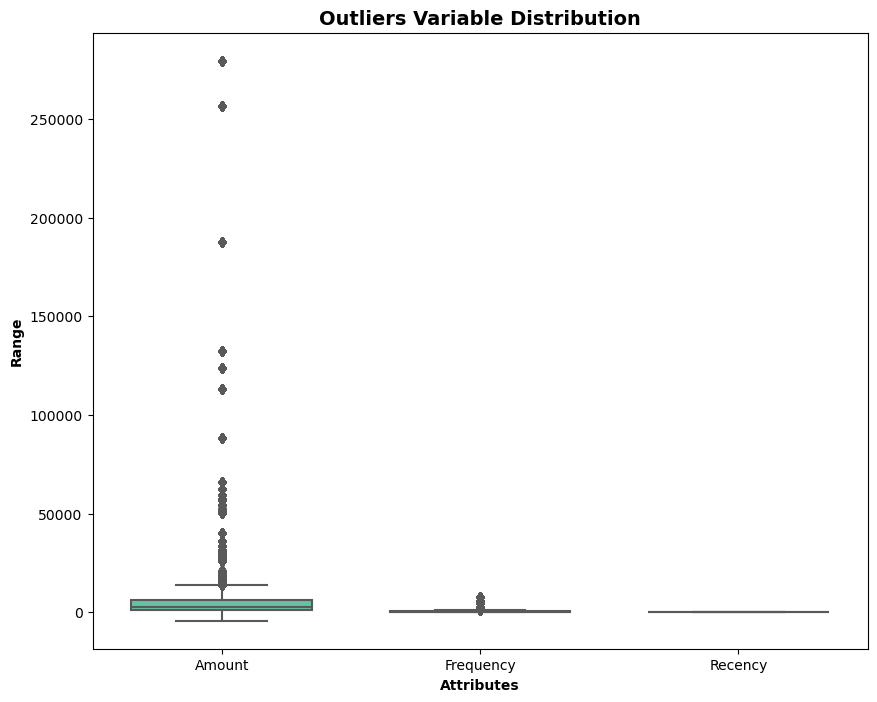

In [27]:
attributes=['Amount', 'Frequency', 'Recency']
plt.rcParams['figure.figsize']=[10,8]
sns.boxplot(data=merge_data[attributes], orient="v", palette="Set2", whis=1.5, saturation=1, width=0.7)
plt.title("Outliers Variable Distribution", fontsize=14, fontweight='bold')
plt.ylabel("Range", fontweight='bold')
plt.xlabel("Attributes", fontweight='bold')

In [28]:
Q1 = merge_data.Amount.quantile(0.05)
Q3 = merge_data.Amount.quantile(0.95)
IQR = Q3-Q1
merge_data = merge_data[(merge_data.Amount >= Q1-1.5*IQR) & (merge_data.Amount <= Q3+1.5*IQR)]

Q1 = merge_data.Recency.quantile(0.05)
Q1 = merge_data.Recency.quantile(0.95)
IQR = Q3-Q1
merge_data = merge_data[(merge_data.Recency >= Q1-1.5*IQR) & (merge_data.Recency <= Q3+1.5*IQR)]

Q1 = merge_data.Frequency.quantile(0.05)
Q1 = merge_data.Frequency.quantile(0.95)
IQR = Q3-Q1
merge_data = merge_data[(merge_data.Frequency >= Q1-1.5*IQR) & (merge_data.Frequency <= Q3+1.5*IQR)]


In [29]:
data_tobe_scaled=merge_data[['Amount', 'Frequency', 'Recency']]
scaler=StandardScaler()
data_scaled = scaler.fit_transform(data_tobe_scaled)
data_scaled.shape

(403960, 3)

In [30]:
data_scaled = pd.DataFrame(data_scaled)
data_scaled.columns = ['Amount', 'Frequency', 'Recency']


In [31]:
kmeans = KMeans(n_clusters=4, max_iter=50, n_init=10 )
kmeans.fit(data_scaled)

KMeans(max_iter=50, n_clusters=4, n_init=10)

In [32]:
kmeans.labels_

array([0, 0, 0, ..., 1, 1, 1])

In [33]:
set(kmeans.labels_)

{0, 1, 2, 3}

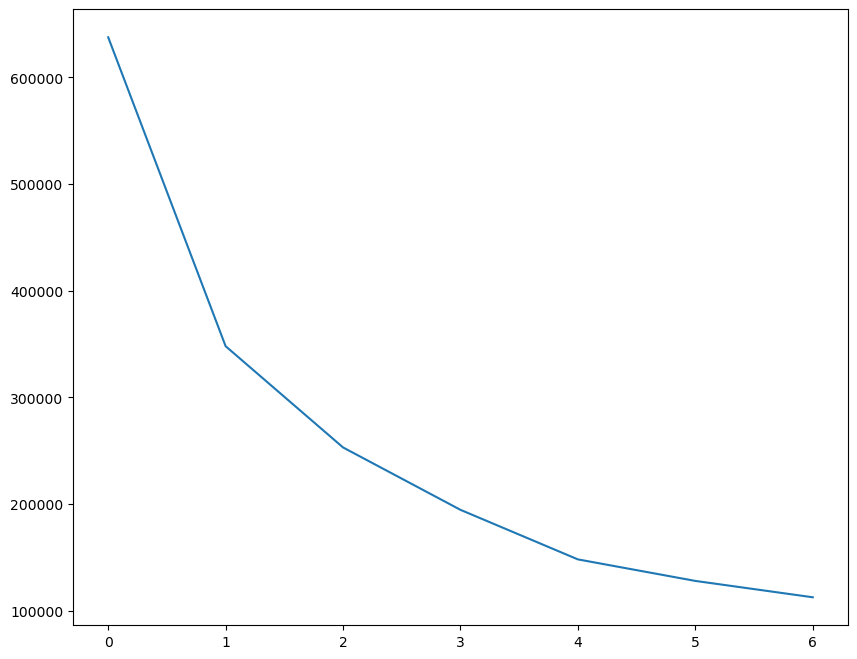

In [34]:
ssd = []
range_n_clusters = [2,3,4,5,6,7,8]
for i in range_n_clusters:
    kmeans = KMeans(n_clusters=i, n_init=10,  max_iter=50)
    kmeans.fit(data_scaled)

    ssd.append(kmeans.inertia_)
plt.plot(ssd)

In [35]:
kmeans = KMeans(n_clusters=3, n_init=10,  max_iter=300)
kmeans.fit(data_scaled)

KMeans(n_clusters=3, n_init=10)

In [36]:
import pickle
filename = 'kmeans_model.pkl'
with open('kmeans_saved_model', 'wb') as file:
    pickle.dump(kmeans, file)
file.close()
pickle.dump(kmeans, open('kmeans_model.pkl', 'wb'))

In [37]:
kmeans.labels_

array([1, 1, 1, ..., 0, 0, 0])

In [38]:
merge_data['ClusterId'] = kmeans.predict(data_scaled) 
merge_data.head()

,CustomerID,Amount,Frequency,Recency,ClusterId
0,12346.0,0.0,2,325,1
1,12346.0,0.0,2,325,1
2,12347.0,4310.0,182,366,1
3,12347.0,4310.0,182,366,1
4,12347.0,4310.0,182,366,1


C:\Users\shikh\New folder\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\shikh\New folder\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


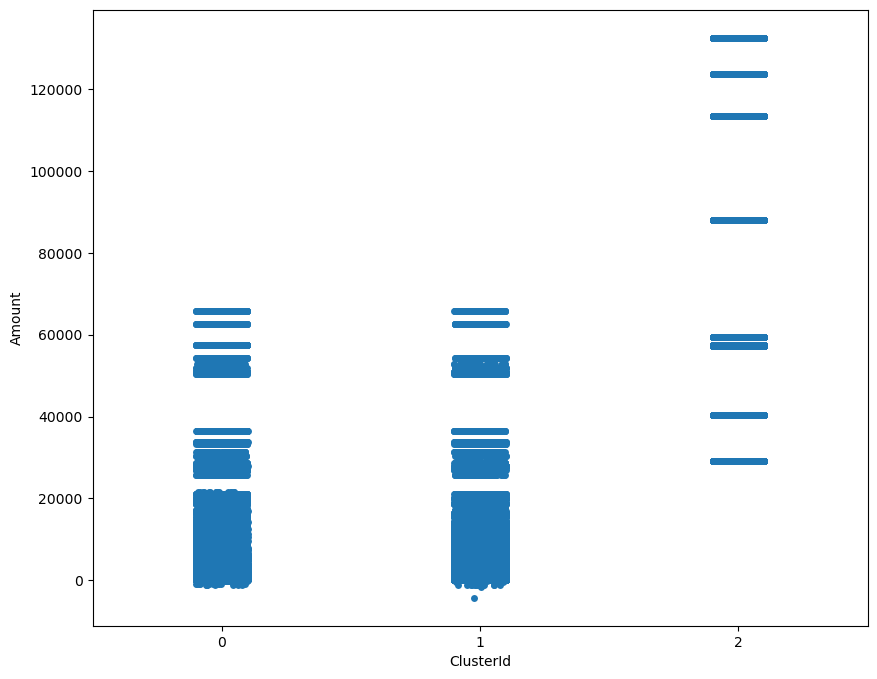

In [64]:
sns.stripplot(x='ClusterId', y='Amount', data=merge_data)
plt.savefig("stripplot1.png")

C:\Users\shikh\New folder\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\shikh\New folder\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


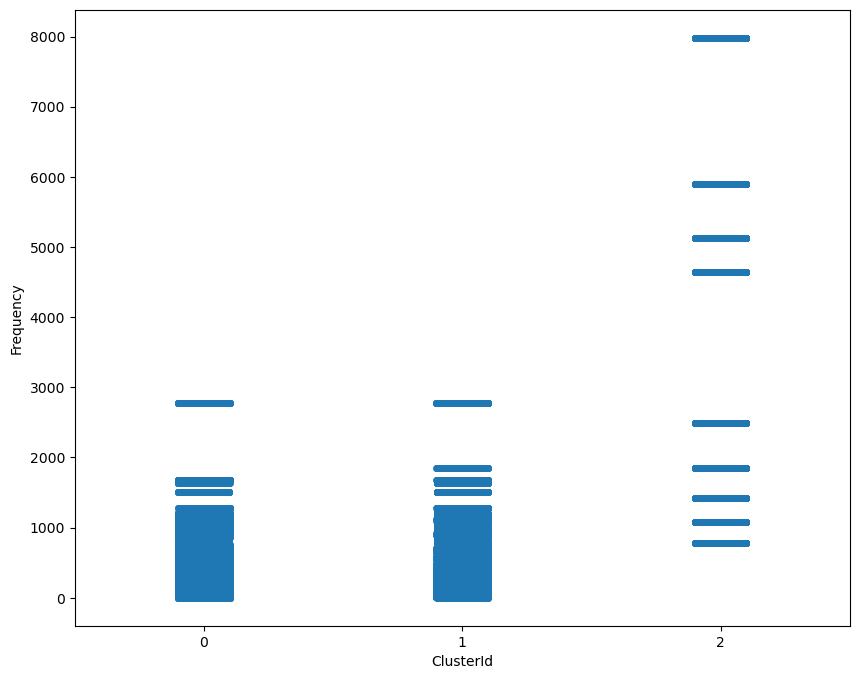

In [39]:
sns.stripplot(x='ClusterId', y='Frequency', data=merge_data)
plt.savefig("stripplot2.png")

C:\Users\shikh\New folder\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\shikh\New folder\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


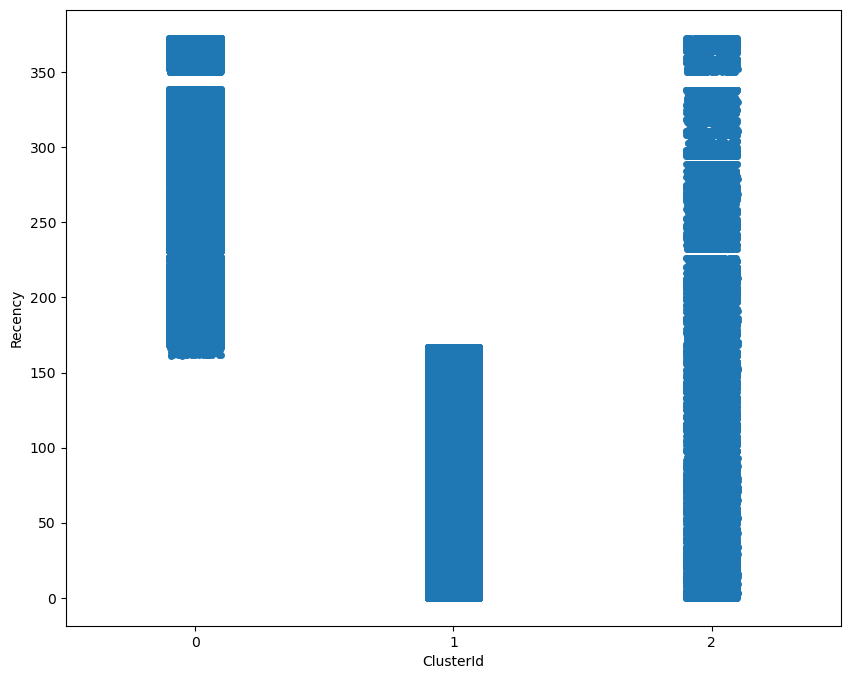

In [66]:
sns.stripplot(x='ClusterId', y='Recency', data=merge_data)
plt.savefig("stripplot3.png")